In [1]:
apikey = 'PbPkYTjobPp742YgS845jDASbkXCQFlnFawWNVJvu25vSB8RBq033swXyQ9pw4RF'
secretkey = 'emuEdcFUeVm6JOvxTsvUWNOyPmXWHo7hEekFmAiUOHgNVXHLhbMyk7yfZgl8j3JU'

In [2]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy

import plotly.graph_objects as go
import seaborn as sns

import datetime

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
client = Client(apikey,secretkey)

### Lấy dữ liệu giá

In [4]:
historical = client.get_historical_klines('LINKUSDT', Client.KLINE_INTERVAL_1DAY, '1 Jan 2011')

### Dữ liệu thô

In [5]:
hist_df = pd.DataFrame(historical)
hist_df.to_excel("LINKUSDT_RAW.xlsx")
hist_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,1547596800000,0.53550000,0.53550000,0.46680000,0.48950000,1343660.31000000,1547683199999,665013.64444900,3492,602419.92000000,300116.38701200,0
1,1547683200000,0.48950000,0.49530000,0.46390000,0.47560000,1411725.35000000,1547769599999,673447.20859700,3987,778386.36000000,370875.08545300,0
2,1547769600000,0.47620000,0.51120000,0.46010000,0.48940000,984417.59000000,1547855999999,474999.28624200,5662,463067.14000000,223476.04649200,0
3,1547856000000,0.49080000,0.50000000,0.46730000,0.48310000,735443.20000000,1547942399999,354090.04104600,4482,335579.52000000,162108.45031700,0
4,1547942400000,0.48030000,0.49200000,0.45900000,0.48340000,677499.56000000,1548028799999,323333.55383800,2098,315527.36000000,150762.22998200,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1101,1642723200000,20.18000000,20.51000000,17.10000000,17.42000000,14621190.27000000,1642809599999,275442573.22190000,462961,7049830.99000000,132768880.06720000,0
1102,1642809600000,17.41000000,17.82000000,14.24000000,15.85000000,18934134.95300000,1642895999999,299956002.60002700,516129,9354467.97000000,148265099.06710000,0
1103,1642896000000,15.86000000,16.88000000,15.15000000,16.64000000,9533639.18000000,1642982399999,152413055.60840000,255366,4784636.79000000,76540220.22240000,0
1104,1642982400000,16.63000000,16.65000000,13.48000000,15.58000000,14743580.99900000,1643068799999,216929048.32175300,403806,7341946.00000000,108089958.93820000,0


In [6]:
hist_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 
                    'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']
hist_df

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,1547596800000,0.53550000,0.53550000,0.46680000,0.48950000,1343660.31000000,1547683199999,665013.64444900,3492,602419.92000000,300116.38701200,0
1,1547683200000,0.48950000,0.49530000,0.46390000,0.47560000,1411725.35000000,1547769599999,673447.20859700,3987,778386.36000000,370875.08545300,0
2,1547769600000,0.47620000,0.51120000,0.46010000,0.48940000,984417.59000000,1547855999999,474999.28624200,5662,463067.14000000,223476.04649200,0
3,1547856000000,0.49080000,0.50000000,0.46730000,0.48310000,735443.20000000,1547942399999,354090.04104600,4482,335579.52000000,162108.45031700,0
4,1547942400000,0.48030000,0.49200000,0.45900000,0.48340000,677499.56000000,1548028799999,323333.55383800,2098,315527.36000000,150762.22998200,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1101,1642723200000,20.18000000,20.51000000,17.10000000,17.42000000,14621190.27000000,1642809599999,275442573.22190000,462961,7049830.99000000,132768880.06720000,0
1102,1642809600000,17.41000000,17.82000000,14.24000000,15.85000000,18934134.95300000,1642895999999,299956002.60002700,516129,9354467.97000000,148265099.06710000,0
1103,1642896000000,15.86000000,16.88000000,15.15000000,16.64000000,9533639.18000000,1642982399999,152413055.60840000,255366,4784636.79000000,76540220.22240000,0
1104,1642982400000,16.63000000,16.65000000,13.48000000,15.58000000,14743580.99900000,1643068799999,216929048.32175300,403806,7341946.00000000,108089958.93820000,0


In [7]:
hist_df['Open Time'] = pd.to_datetime(hist_df['Open Time']/1000, unit = 's')
del hist_df['Close Time']
#Đổi tên
names = hist_df.columns.tolist()
names[names.index('Open Time')] = 'Date'
hist_df.columns = names

numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']
hist_df[numeric_columns] = hist_df[numeric_columns].apply(pd.to_numeric, axis=1)
hist_df

,Date,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2019-01-16,0.5355,0.5355,0.4668,0.4895,1.343660e+06,6.650136e+05,3492,602419.92,3.001164e+05,0
1,2019-01-17,0.4895,0.4953,0.4639,0.4756,1.411725e+06,6.734472e+05,3987,778386.36,3.708751e+05,0
2,2019-01-18,0.4762,0.5112,0.4601,0.4894,9.844176e+05,4.749993e+05,5662,463067.14,2.234760e+05,0
3,2019-01-19,0.4908,0.5000,0.4673,0.4831,7.354432e+05,3.540900e+05,4482,335579.52,1.621085e+05,0
4,2019-01-20,0.4803,0.4920,0.4590,0.4834,6.774996e+05,3.233336e+05,2098,315527.36,1.507622e+05,0
...,...,...,...,...,...,...,...,...,...,...,...
1101,2022-01-21,20.1800,20.5100,17.1000,17.4200,1.462119e+07,2.754426e+08,462961,7049830.99,1.327689e+08,0
1102,2022-01-22,17.4100,17.8200,14.2400,15.8500,1.893413e+07,2.999560e+08,516129,9354467.97,1.482651e+08,0
1103,2022-01-23,15.8600,16.8800,15.1500,16.6400,9.533639e+06,1.524131e+08,255366,4784636.79,7.654022e+07,0
1104,2022-01-24,16.6300,16.6500,13.4800,15.5800,1.474358e+07,2.169290e+08,403806,7341946.00,1.080900e+08,0


In [8]:
hist_df = hist_df.set_index('Date')
hist_df

,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
Date,,,,,,,,,,
2019-01-16,0.5355,0.5355,0.4668,0.4895,1.343660e+06,6.650136e+05,3492,602419.92,3.001164e+05,0
2019-01-17,0.4895,0.4953,0.4639,0.4756,1.411725e+06,6.734472e+05,3987,778386.36,3.708751e+05,0
2019-01-18,0.4762,0.5112,0.4601,0.4894,9.844176e+05,4.749993e+05,5662,463067.14,2.234760e+05,0
2019-01-19,0.4908,0.5000,0.4673,0.4831,7.354432e+05,3.540900e+05,4482,335579.52,1.621085e+05,0
2019-01-20,0.4803,0.4920,0.4590,0.4834,6.774996e+05,3.233336e+05,2098,315527.36,1.507622e+05,0
...,...,...,...,...,...,...,...,...,...,...
2022-01-21,20.1800,20.5100,17.1000,17.4200,1.462119e+07,2.754426e+08,462961,7049830.99,1.327689e+08,0
2022-01-22,17.4100,17.8200,14.2400,15.8500,1.893413e+07,2.999560e+08,516129,9354467.97,1.482651e+08,0
2022-01-23,15.8600,16.8800,15.1500,16.6400,9.533639e+06,1.524131e+08,255366,4784636.79,7.654022e+07,0


In [9]:
LINK_100MA = hist_df["Close"].rolling(window=100).mean()
hist_df["100MA"] = LINK_100MA
hist_df

,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore,100MA
Date,,,,,,,,,,,
2019-01-16,0.5355,0.5355,0.4668,0.4895,1.343660e+06,6.650136e+05,3492,602419.92,3.001164e+05,0,NaN
2019-01-17,0.4895,0.4953,0.4639,0.4756,1.411725e+06,6.734472e+05,3987,778386.36,3.708751e+05,0,NaN
2019-01-18,0.4762,0.5112,0.4601,0.4894,9.844176e+05,4.749993e+05,5662,463067.14,2.234760e+05,0,NaN
2019-01-19,0.4908,0.5000,0.4673,0.4831,7.354432e+05,3.540900e+05,4482,335579.52,1.621085e+05,0,NaN
2019-01-20,0.4803,0.4920,0.4590,0.4834,6.774996e+05,3.233336e+05,2098,315527.36,1.507622e+05,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-21,20.1800,20.5100,17.1000,17.4200,1.462119e+07,2.754426e+08,462961,7049830.99,1.327689e+08,0,25.5873
2022-01-22,17.4100,17.8200,14.2400,15.8500,1.893413e+07,2.999560e+08,516129,9354467.97,1.482651e+08,0,25.4786
2022-01-23,15.8600,16.8800,15.1500,16.6400,9.533639e+06,1.524131e+08,255366,4784636.79,7.654022e+07,0,25.3749


In [10]:
df1 = hist_df[["Close", "100MA"]]
df1.dropna(inplace=True)
df1

,Close,100MA
Date,,
2019-04-25,0.4503,0.471590
2019-04-26,0.4416,0.471111
2019-04-27,0.4430,0.470785
2019-04-28,0.4510,0.470401
2019-04-29,0.4338,0.469908
...,...,...
2022-01-21,17.4200,25.587300
2022-01-22,15.8500,25.478600
2022-01-23,16.6400,25.374900


In [11]:
Attribute = []
for i in range(0,df1.shape[0]):
    if df1["Close"].iloc[i] > df1["100MA"].iloc[i]:
        Attribute.append("Long")
    else:
        Attribute.append("Short")

df1["Attribute"] = Attribute
df1

,Close,100MA,Attribute
Date,,,
2019-04-25,0.4503,0.471590,Short
2019-04-26,0.4416,0.471111,Short
2019-04-27,0.4430,0.470785,Short
2019-04-28,0.4510,0.470401,Short
2019-04-29,0.4338,0.469908,Short
...,...,...,...
2022-01-21,17.4200,25.587300,Short
2022-01-22,15.8500,25.478600,Short
2022-01-23,16.6400,25.374900,Short


In [12]:
df1["return"] = (df1["Close"] - df1["Close"].shift())/df1["Close"].shift()
df1.dropna(inplace=True)
df1

,Close,100MA,Attribute,return
Date,,,,
2019-04-26,0.4416,0.471111,Short,-0.019320
2019-04-27,0.4430,0.470785,Short,0.003170
2019-04-28,0.4510,0.470401,Short,0.018059
2019-04-29,0.4338,0.469908,Short,-0.038137
2019-04-30,0.4727,0.469801,Long,0.089673
...,...,...,...,...
2022-01-21,17.4200,25.587300,Short,-0.136341
2022-01-22,15.8500,25.478600,Short,-0.090126
2022-01-23,16.6400,25.374900,Short,0.049842


In [13]:
#Đối với SMA

LongShort = [0]*df1.shape[0]
LongHold = [0]*df1.shape[0]

LongShort[0] = df1["Close"].iloc[0]
LongShort[1] = df1["Close"].iloc[0]
LongHold[0] = df1["Close"].iloc[0]    
LongHold[1] = df1["Close"].iloc[0]    

    
for i in range(0, df1.shape[0]-2):
    if df1["Attribute"].iloc[i] == "Long":
        LongShort[i+2] = LongShort[i+1]*(1+df1["return"][i+2])
    else:
        LongShort[i+2] = LongShort[i+1]/(1+df1["return"][i+2])
        
for i in range(0, df1.shape[0]-2):
    if df1["Attribute"].iloc[i] == "Long":
        LongHold[i+2] = LongHold[i+1]*(1+df1["return"][i+2])
    else:
        LongHold[i+2] = LongHold[i+1]

df1["LongShort"] = LongShort
df1["LongHold"] = LongHold
df1.drop(df1.tail(1).index,inplace=True)
df1

,Close,100MA,Attribute,return,LongShort,LongHold
Date,,,,,,
2019-04-26,0.4416,0.471111,Short,-0.019320,0.441600,0.44160
2019-04-27,0.4430,0.470785,Short,0.003170,0.441600,0.44160
2019-04-28,0.4510,0.470401,Short,0.018059,0.433767,0.44160
2019-04-29,0.4338,0.469908,Short,-0.038137,0.450965,0.44160
2019-04-30,0.4727,0.469801,Long,0.089673,0.413854,0.44160
...,...,...,...,...,...,...
2022-01-20,20.1700,25.669700,Short,-0.064037,1.330817,5.17279
2022-01-21,17.4200,25.587300,Short,-0.136341,1.540906,5.17279
2022-01-22,15.8500,25.478600,Short,-0.090126,1.693539,5.17279


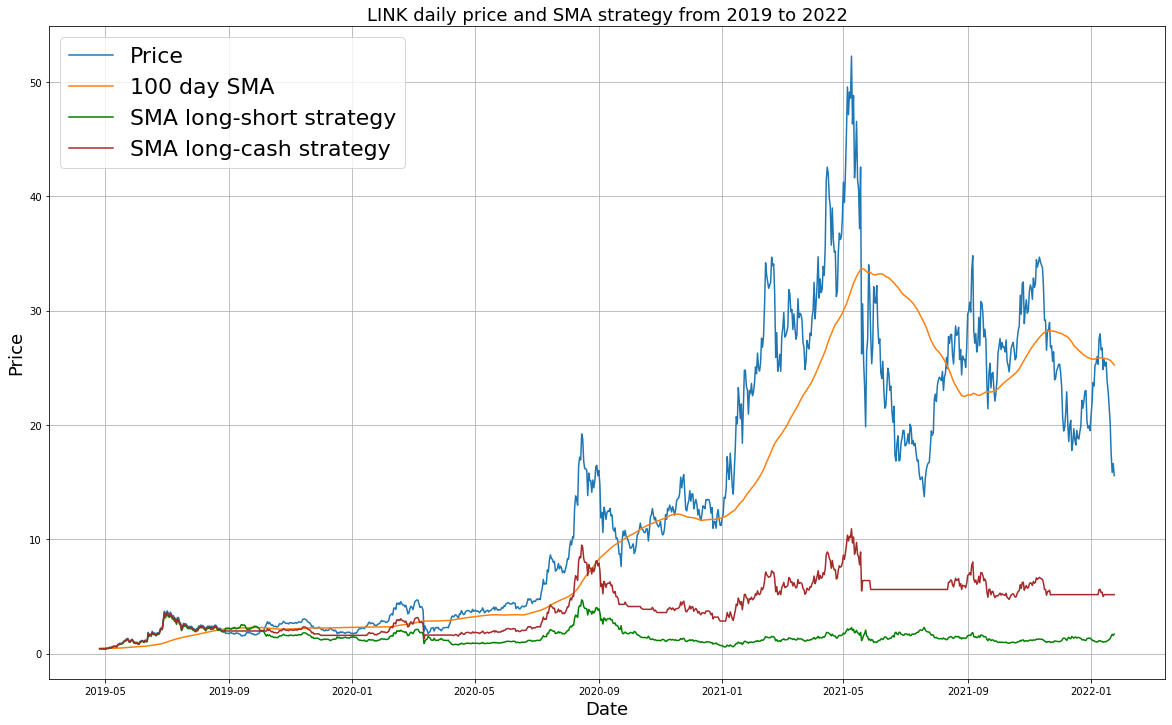

In [14]:
#Vẽ SMA

fig = plt.figure(figsize=(20,12))
ax1 = plt.plot(df1["Close"])
ax1 = plt.plot(df1["100MA"])
ax1 = plt.plot(df1["LongShort"], color="green")
ax1 = plt.plot(df1["LongHold"], color="brown")
ax1 = plt.title("LINK daily price and SMA strategy from 2019 to 2022", fontsize=18)
ax1 = plt.xlabel("Date", fontsize=18)
ax1 = plt.ylabel("Price", fontsize=18)
ax1 = plt.legend(["Price", "100 day SMA", "SMA long-short strategy",
                  "SMA long-cash strategy"],prop={"size":22}, loc="upper left")
plt.grid(True)
plt.show()

In [15]:
# Đối với EMA

LINK_100EMA = hist_df["Close"].ewm(100).mean()
hist_df["100EMA"] = LINK_100EMA

df2 = hist_df[["Close", "100EMA"]]
df2.dropna(inplace=True)

Attribute = []
for i in range(0,df2.shape[0]):
    if df2["Close"].iloc[i] > df2["100EMA"].iloc[i]:
        Attribute.append("Long")
    else:
        Attribute.append("Short")

df2["Attribute"] = Attribute

df2["return"] = (df2["Close"] - df2["Close"].shift())/df2["Close"].shift()
df2.dropna(inplace=True)

LongShort = [0]*df2.shape[0]
LongHold = [0]*df2.shape[0]

LongShort[0] = df2["Close"].iloc[0]
LongShort[1] = df2["Close"].iloc[0]
LongHold[0] = df2["Close"].iloc[0]    
LongHold[1] = df2["Close"].iloc[0]    

    
for i in range(0, df2.shape[0]-2):
    if df2["Attribute"].iloc[i] == "Long":
        LongShort[i+2] = LongShort[i+1]*(1+df2["return"][i+2])
    else:
        LongShort[i+2] = LongShort[i+1]/(1+df2["return"][i+2])
        
for i in range(0, df2.shape[0]-2):
    if df2["Attribute"].iloc[i] == "Long":
        LongHold[i+2] = LongHold[i+1]*(1+df2["return"][i+2])
    else:
        LongHold[i+2] = LongHold[i+1]

df2["LongShort"] = LongShort
df2["LongHold"] = LongHold
df2.drop(df2.tail(1).index,inplace=True)
df2

,Close,100EMA,Attribute,return,LongShort,LongHold
Date,,,,,,
2019-01-17,0.4756,0.482515,Short,-0.028396,0.475600,0.475600
2019-01-18,0.4894,0.484833,Long,0.029016,0.475600,0.475600
2019-01-19,0.4831,0.484393,Short,-0.012873,0.481802,0.475600
2019-01-20,0.4834,0.484191,Short,0.000621,0.482101,0.475895
2019-01-21,0.4972,0.486413,Long,0.028548,0.468720,0.475895
...,...,...,...,...,...,...
2022-01-20,20.1700,24.997409,Short,-0.064037,2.517471,7.024641
2022-01-21,17.4200,24.922384,Short,-0.136341,2.914890,7.024641
2022-01-22,15.8500,24.832557,Short,-0.090126,3.203621,7.024641


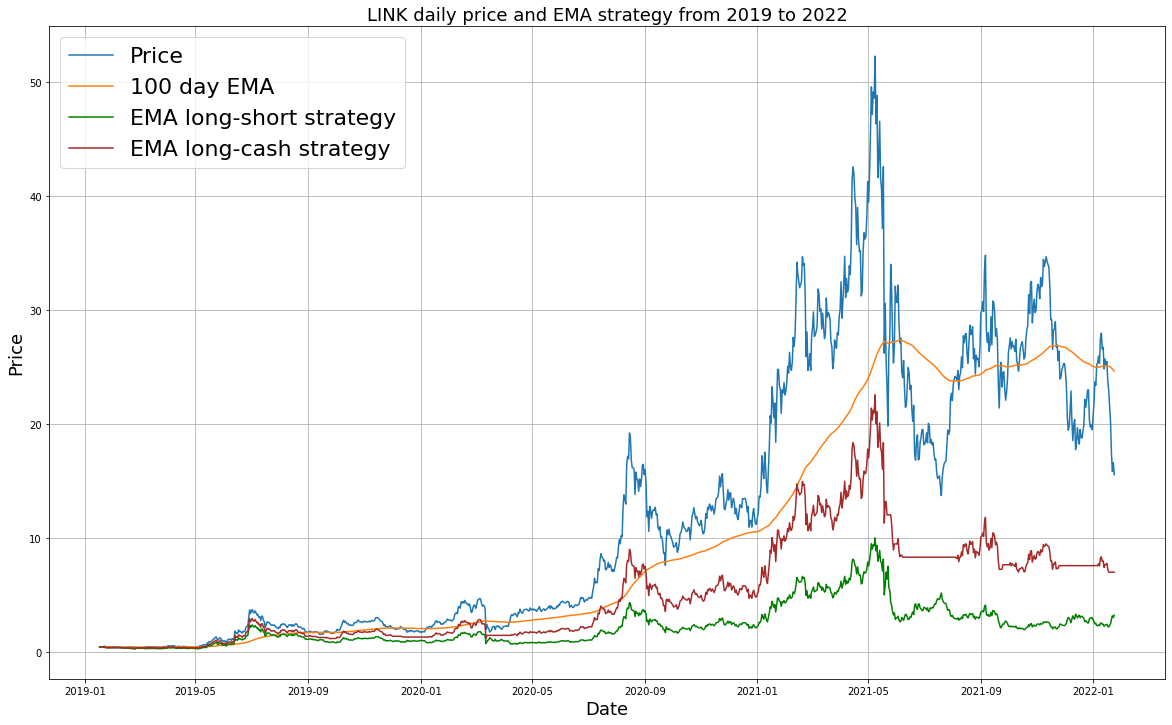

In [16]:
#Vẽ EMA

fig = plt.figure(figsize=(20,12))
ax1 = plt.plot(df2["Close"])
ax1 = plt.plot(df2["100EMA"])
ax1 = plt.plot(df2["LongShort"], color="green")
ax1 = plt.plot(df2["LongHold"], color="brown")
ax1 = plt.title("LINK daily price and EMA strategy from 2019 to 2022", fontsize=18)
ax1 = plt.xlabel("Date", fontsize=18)
ax1 = plt.ylabel("Price", fontsize=18)
ax1 = plt.legend(["Price", "100 day EMA", "EMA long-short strategy", "EMA long-cash strategy"],prop={"size":22}, loc="upper left")
plt.grid(True)
plt.show()

In [17]:
#Đối với MACD

LINK_26EMA = hist_df["Close"].ewm(26).mean()
LINK_156EMA = hist_df["Close"].ewm(156).mean()
hist_df["26EMA"] = LINK_26EMA
hist_df["156EMA"] = LINK_156EMA


df3 = hist_df[["Close","26EMA", "156EMA"]]
df3.dropna(inplace=True)

Attribute = []
for i in range(0,df3.shape[0]):
    if df3["26EMA"].iloc[i] > df3["156EMA"].iloc[i]:
        Attribute.append("Long")
    else:
        Attribute.append("Short")

df3["Attribute"] = Attribute

df3["return"] = (df3["Close"] - df3["Close"].shift())/df3["Close"].shift()
df3.dropna(inplace=True)

LongShort = [0]*df3.shape[0]
LongHold = [0]*df3.shape[0]

LongShort[0] = df3["Close"].iloc[0]
LongShort[1] = df3["Close"].iloc[0]
LongHold[0] = df3["Close"].iloc[0]    
LongHold[1] = df3["Close"].iloc[0]    

    
for i in range(0, df3.shape[0]-2):
    if df3["Attribute"].iloc[i] == "Long":
        LongShort[i+2] = LongShort[i+1]*(1+df3["return"][i+2])
    else:
        LongShort[i+2] = LongShort[i+1]/(1+df3["return"][i+2])
        
for i in range(0, df3.shape[0]-2):
    if df3["Attribute"].iloc[i] == "Long":
        LongHold[i+2] = LongHold[i+1]*(1+df3["return"][i+2])
    else:
        LongHold[i+2] = LongHold[i+1]

df3["LongShort"] = LongShort
df3["LongHold"] = LongHold
df3.drop(df3.tail(1).index,inplace=True)
df3

,Close,26EMA,156EMA,Attribute,return,LongShort,LongHold
Date,,,,,,,
2019-01-17,0.4756,0.482419,0.482528,Short,-0.028396,0.475600,0.475600
2019-01-18,0.4894,0.484834,0.484833,Long,0.029016,0.475600,0.475600
2019-01-19,0.4831,0.484376,0.484396,Short,-0.012873,0.481802,0.475600
2019-01-20,0.4834,0.484166,0.484194,Short,0.000621,0.482101,0.475895
2019-01-21,0.4972,0.486548,0.486396,Long,0.028548,0.468720,0.475895
...,...,...,...,...,...,...,...
2022-01-20,20.1700,23.728783,24.338710,Short,-0.064037,3.582717,8.380080
2022-01-21,17.4200,23.495125,24.294603,Short,-0.136341,4.148301,8.380080
2022-01-22,15.8500,23.211972,24.240769,Short,-0.090126,4.559206,8.380080


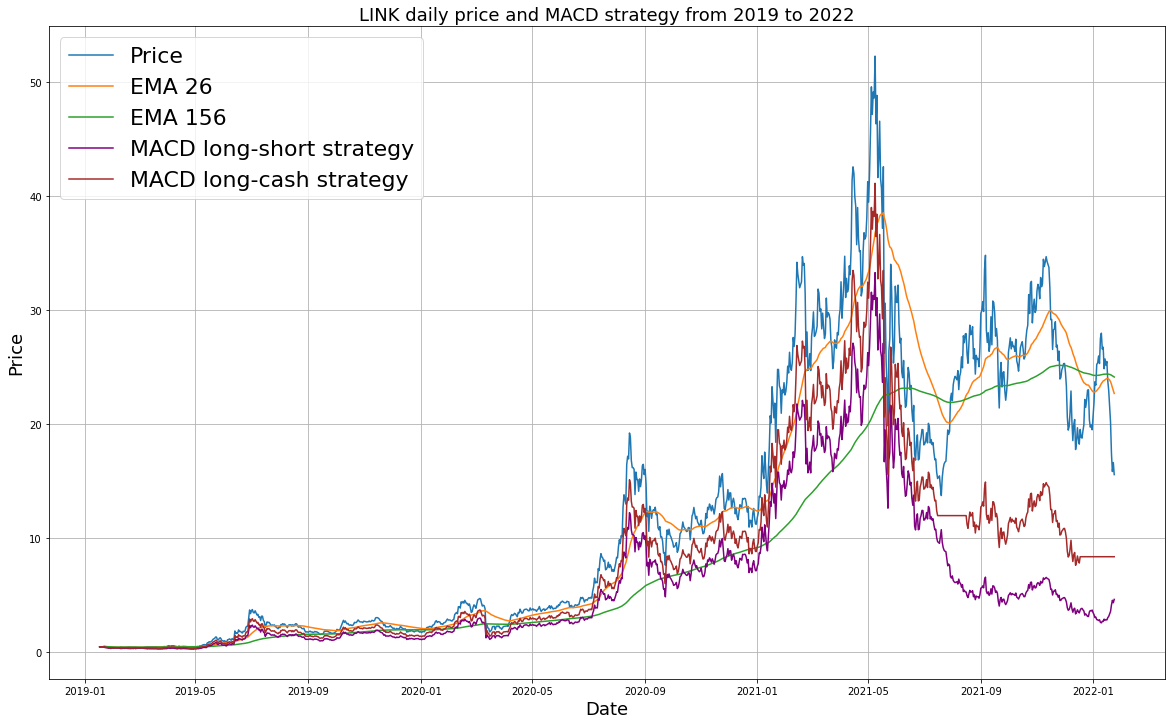

In [18]:
#Vẽ MACD

fig = plt.figure(figsize=(20,12))
ax1 = plt.plot(df3["Close"])
ax1 = plt.plot(df3["26EMA"])
ax1 = plt.plot(df3["156EMA"])
ax1 = plt.plot(df3["LongShort"], color="purple")
ax1 = plt.plot(df3["LongHold"], color="brown")
ax1 = plt.title("LINK daily price and MACD strategy from 2019 to 2022", fontsize=18)
ax1 = plt.xlabel("Date", fontsize=18)
ax1 = plt.ylabel("Price", fontsize=18)
ax1 = plt.legend(["Price", "EMA 26", "EMA 156", "MACD long-short strategy", "MACD long-cash strategy"],prop={"size":22}, loc="upper left")
plt.grid(True)
plt.show()

In [19]:
def annualize_vol(s, periods_per_year):
    if isinstance(s, pd.DataFrame):
        return s.aggregate(annualize_vol, periods_per_year=periods_per_year )
    elif isinstance(s, pd.Series):
        return s.std() * (periods_per_year)**(0.5)
    elif isinstance(s, list):
        return np.std(s) * (periods_per_year)**(0.5)
    elif isinstance(s, (int,float)):
        return s * (periods_per_year)**(0.5)
    
def var_historic(s, level=0.05):
    if isinstance(s, pd.DataFrame):
        return s.aggregate( var_historic, level=level )
    elif isinstance(s, pd.Series):
        return - np.percentile(s, level*100)
    else:
        raise TypeError("Expected pd.DataFrame or pd.Series")
        
def var_gaussian(s, level=0.05, cf=False):
    za = scipy.stats.norm.ppf(level,0,1) 
    if cf:
        S = skewness(s)
        K = kurtosis(s)
        za = za + (za**2 - 1)*S/6 + (za**3 - 3*za)*(K-3)/24 - (2*za**3 - 5*za)*(S**2)/36    
    return -( s.mean() + za * s.std(ddof=0) )

def cvar_historic(s, level=0.05):
    if isinstance(s, pd.DataFrame):
        return s.aggregate( cvar_historic, level=level )
    elif isinstance(s, pd.Series):
        mask = s < -var_historic(s, level=level)
        return -s[mask].mean()
    else:
        raise TypeError("Expected pd.DataFrame or pd.Series")

def annualize_rets(s, periods_per_year):
    if isinstance(s, pd.DataFrame):
        return s.aggregate( annualize_rets, periods_per_year=periods_per_year )
    elif isinstance(s, pd.Series):
        growth = (1 + s).prod()
        n_period_growth = s.shape[0]
        return growth**(periods_per_year/n_period_growth) - 1
 

def skewness(s):
    return ( ((s - s.mean()) / s.std(ddof=0))**3 ).mean()

def kurtosis(s):
    return ( ((s - s.mean()) / s.std(ddof=0))**4 ).mean()



def summary_stats(s, risk_free_rate=0.03, periods_per_year=252, var_level=0.05):
    stats = {
            "Ann. return"  : annualize_rets(s, periods_per_year=periods_per_year),
            "Ann. vol"     : annualize_vol(s, periods_per_year=periods_per_year),
            "Skewness"     : skewness(s),
            "Kurtosis"     : kurtosis(s),
            "Historic CVar": cvar_historic(s, level=var_level),
            "C-F Var"      : var_gaussian(s, level=var_level, cf=True),
        }
    return pd.DataFrame(stats)

In [20]:
def strategies(df, days, MA=False, EMA=False, MACD=False):
    if MA==True:
        df["MA"] = df["Close"].rolling(window=days).mean()
    
    if EMA==True:
        df["EMA"] = df["Close"].ewm(span=days).mean()

    if MACD==True:
        df["EMA_26"] = df["Close"].ewm(26).mean()
        df["EMA_156"] = df["Close"].ewm(156).mean()
            
    return df
    

def attribute(df, MA=False, EMA=False, MACD=False):
    df_attribute = pd.DataFrame(index=df.index)
    if MA==True:
        MA_attribute = []    
        for i in range(0,df.shape[0]):
            if df["Close"].iloc[i] > df["MA"].iloc[i]:
                MA_attribute.append("Long")
            else:
                MA_attribute.append("Short")
        df_attribute["MA_attribute"] = MA_attribute
    
    if EMA==True:
        EMA_attribute = []
        for i in range(0,df.shape[0]):
            if df["Close"].iloc[i] > df["EMA"].iloc[i]:
                EMA_attribute.append("Long")
            else:
                EMA_attribute.append("Short")
        df_attribute["EMA_attribute"] = EMA_attribute
        
    if MACD==True:
        MACD_attribute = []
        for i in range(0,df.shape[0]):
            if df["EMA_26"].iloc[i] > df["EMA_156"].iloc[i]:
                MACD_attribute.append("Long")
            else:
                MACD_attribute.append("Short")
        df_attribute["MACD_attribute"] = MACD_attribute
    
    return df_attribute


def price_of_strategy(df, df_attribute, LongHold=False, LongShort=False, MA=False, EMA=False, MACD=False):
    
    df_price_of_strategy = pd.DataFrame(index=df_attribute.index)
    df_price_of_strategy["Price"] = df["Close"]
    if LongHold == True:
        if MA == True:
            LongHold = [0]*df.shape[0]
            LongHold[0] = df["Close"].iloc[0]
            LongHold[1] = df["Close"].iloc[0]
            for i in range(0, df_attribute.shape[0]-2):
                if df_attribute["MA_attribute"].iloc[i] == "Long":
                    LongHold[i+2] = LongHold[i+1]*(1+df["return"][i+2])
                else:
                    LongHold[i+2] = LongHold[i+1]
            df_price_of_strategy["LongHold MA"] = LongHold
            
        if EMA == True:
            LongHold = [0]*df.shape[0]
            LongHold[0] = df["Close"].iloc[0]
            LongHold[1] = df["Close"].iloc[0]
            for i in range(0, df_attribute.shape[0]-2):
                if df_attribute["EMA_attribute"].iloc[i] == "Long":
                    LongHold[i+2] = LongHold[i+1]*(1+df["return"][i+2])
                else:
                    LongHold[i+2] = LongHold[i+1]
            df_price_of_strategy["LongHold EMA"] = LongHold
            
        if MACD == True:
            LongHold = [0]*df.shape[0]
            LongHold[0] = df["Close"].iloc[0]
            LongHold[1] = df["Close"].iloc[0]
            for i in range(0, df_attribute.shape[0]-2):
                if df_attribute["MACD_attribute"].iloc[i] == "Long":
                    LongHold[i+2] = LongHold[i+1]*(1+df["return"][i+2])
                else:
                    LongHold[i+2] = LongHold[i+1]
            df_price_of_strategy["LongHold MACD"] = LongHold
    
    
    if LongShort == True:
        if MA == True:
            LongShort = [0]*df.shape[0]
            LongShort[0] = df["Close"].iloc[0]
            LongShort[1] = df["Close"].iloc[0]
            for i in range(0, df.shape[0]-2):
                if df_attribute["MA_attribute"].iloc[i] == "Long":
                    LongShort[i+2] = LongShort[i+1]*(1+df["return"][i+2])
                else:
                    LongShort[i+2] = LongShort[i+1]/(1+df["return"][i+2])
            df_price_of_strategy["Long-Short MA"] = LongShort
                
        if EMA == True:
            LongShort = [0]*df.shape[0]
            LongShort[0] = df["Close"].iloc[0]
            LongShort[1] = df["Close"].iloc[0]
            for i in range(0, df.shape[0]-2):
                if df_attribute["EMA_attribute"].iloc[i] == "Long":
                    LongShort[i+2] = LongShort[i+1]*(1+df["return"][i+2])
                else:
                    LongShort[i+2] = LongShort[i+1]/(1+df["return"][i+2])
            df_price_of_strategy["Long-Short EMA"] = LongShort
            
        if MACD == True:
            LongShort = [0]*df.shape[0]
            LongShort[0] = df["Close"].iloc[0]
            LongShort[1] = df["Close"].iloc[0]
            for i in range(0, df.shape[0]-2):
                if df_attribute["MACD_attribute"].iloc[i] == "Long":
                    LongShort[i+2] = LongShort[i+1]*(1+df["return"][i+2])
                else:
                    LongShort[i+2] = LongShort[i+1]/(1+df["return"][i+2])
            df_price_of_strategy["Long-Short MACD"] = LongShort
    
    return df_price_of_strategy


def strategy_returns(df, df_price_of_strategy):
    df_return_of_strategy = pd.DataFrame(index=df_price_of_strategy.index)
    cols = df_price_of_strategy.columns
    
    for priceSeries in cols:
        df_return_of_strategy[priceSeries] = (df_price_of_strategy[priceSeries]
                    - df_price_of_strategy[priceSeries].shift())/(df_price_of_strategy[priceSeries].shift())
    
    return df_return_of_strategy
def strategy(days, MA=False, EMA=False, MACD=False, LongHold=False, LongShort=False):
    # Load dữ liệu
    df = hist_df
    # Trả lại cột nhận lại theo ngày
    df["return"] = (df["Close"] - df["Close"].shift())/df["Close"].shift()
    
    # Chỉ giữ lại cột giá đóng cửa và return
    df = df[["Close", "return"]]
    
    # Chọn đường mà chúng ta muốn tính
    df = strategies(df=df, days=100, MA=MA, EMA=EMA, MACD=MACD)
    
    # dropna
    df.dropna(inplace=True)
    
    # Đưa vào dataframe tính chất
    df_attribute = attribute(df, MA=MA, EMA=EMA, MACD=MACD)

    df_price_of_strategy = price_of_strategy(df, df_attribute, LongHold=LongHold,
                                             LongShort=LongHold, MA=MA, EMA=EMA, MACD=MACD)
    df_price_of_strategy = df_price_of_strategy.drop(df_price_of_strategy.tail(2).index)

    # Xem kết quả
    df_return_of_strategy = strategy_returns(df, df_price_of_strategy)
    df_return_of_strategy.dropna(inplace=True)
    table = summary_stats(df_return_of_strategy)
    return df, table, df_return_of_strategy, df_attribute, df_price_of_strategy

def plot_strategy(df):
    fig = plt.figure(figsize=(20,10))
    ax1 = plt.plot(df)
    ax1 = plt.title("Comparing investment strategies from 2019 to 2022" , fontsize=22)
    ax1 = plt.xlabel("Date", fontsize=18)
    ax1 = plt.ylabel("Price", fontsize=18)
    ax1 = plt.legend(list(df_price_of_strategy.columns),prop={"size":18}, loc="upper left")
    
    for legobj in ax1.legendHandles:
        legobj.set_linewidth(5.0)

    plt.grid(True)
    plt.show()

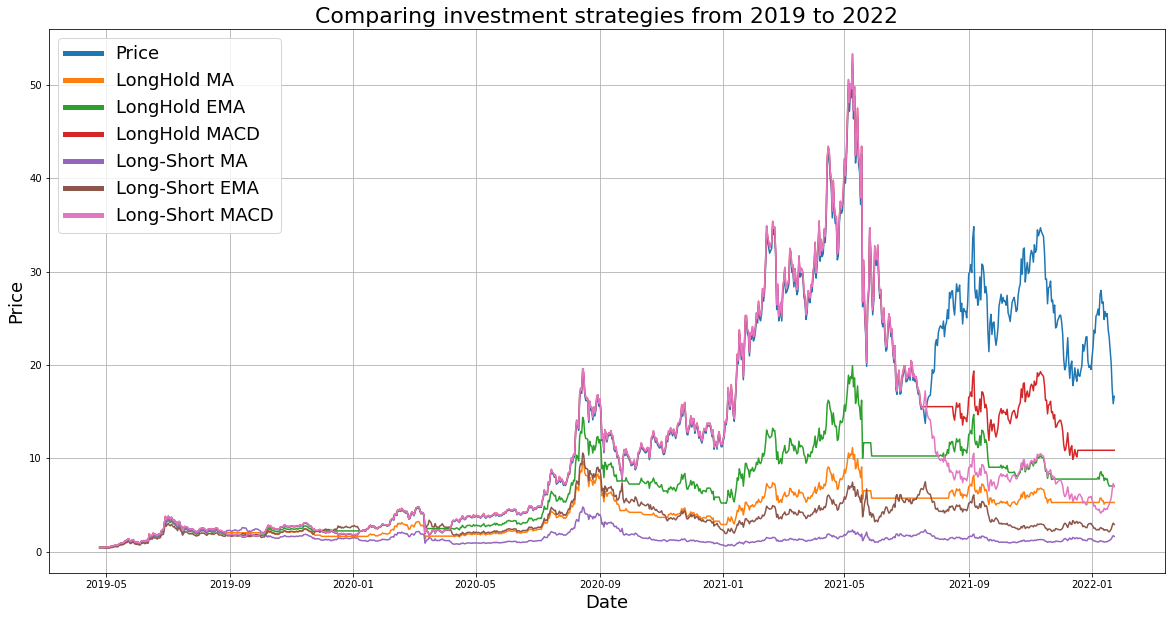

,Ann. return,Ann. vol,Skewness,Kurtosis,Historic CVar,C-F Var
Price,1.474425,1.140620,0.693364,12.521617,0.140334,0.083369
LongHold MA,0.854549,0.984391,0.953347,20.352316,0.126762,0.058028
LongHold EMA,0.993672,0.986369,0.936861,20.158682,0.126330,0.058428
LongHold MACD,1.223218,1.118299,0.754963,13.495400,0.139195,0.079409
Long-Short MA,0.383171,1.136455,0.621011,12.412072,0.141774,0.087118
Long-Short EMA,0.598477,1.136218,0.604372,12.400161,0.142145,0.086908
Long-Short MACD,0.987757,1.141251,0.718060,12.531289,0.140044,0.083723


In [21]:
days = 100
df,table, df_return_of_strategy, df_attribute, df_price_of_strategy = strategy(
             days=days, MA=True, EMA=True, MACD=True, LongHold=True, LongShort=True)

plot_strategy(df=df_price_of_strategy)
table